# Data Normalization

We have some source data as a vector of real values $x = (x_0, x_2,\dots, x_{n-1}) \in \mathbb{R}^n$. Normalization of $X$ is a function $f: \mathbb{R}^n \to \mathbb{R}^n$ that maps the data into a suitable range while preserving relations between the components. E.g., if $f(x) = (y_0, y_1,\ldots,y_{n-1})$ and if $x_i \ge x_j$, for some integers $i$, $j$ between $0$ and $n-1$, then it should hold $y_i \ge y_j$.

## Min-max normalization onto an interval $\langle A,B \rangle$

Implement a function `mmnormalize_list(x, A=0, B=1)` that maps an arbitrary input vector `x`, represented as a **list** of floats, linearly onto the interval $\langle A,B \rangle$. Usually, we use min-max normalization onto the interval $\langle 0, 1 \rangle$ or $\langle -1, 1 \rangle$. For example

    >>> mmnormalize_list([0.12, 3, -123],-1,1)
    [0.9542857142857144, 1.0, -1.0]
    
    >>> mmnormalize_list([0.12, 3, -123],0,1)
    [0.9771428571428572, 1.0, 0.0]

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### Min-max normalization on a list and a numpy array

In [5]:
def mmnormalize_list(x, A=0, B=1):
    # x is a list of floats
    # returns a list with values maped linearly into the interval <A,B>
    # your code goes here
    minx, maxx = min(x), max(x)
    if minx == maxx:
        return [A] * len(x)
    return [(i - minx)/(maxx - minx) * (B - A) + A for i in x]

print(mmnormalize_list([0.12, 3, -123],-1,1))
print(mmnormalize_list([-5,-2,-1,0,10],0,1))
assert(np.allclose(mmnormalize_list([-5,-2,-1,0,10],0,1), [0.0, 0.2, 0.26666666666666666, 0.3333333333333333, 1.0]))

[0.9542857142857144, 1.0, -1.0]
[0.0, 0.2, 0.26666666666666666, 0.3333333333333333, 1.0]


Using `matplotlib`, depict in a single plot `x` and `mmnormalize_list(x,A,B)` –- e.g., with `x` on the horizontal axis and `mmnormalize_list(x,A,B)` on the vertical axis.

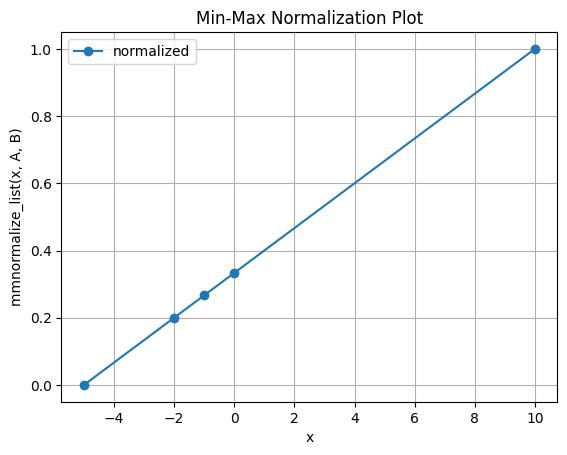

In [6]:
x = [-5,-2,-1,0,10]
A = 0
B = 1
# your code goes here
normalized_x = mmnormalize_list(x,A,B)

plt.plot(x, normalized_x, label='normalized', marker='o')
plt.xlabel('x')
plt.ylabel('mmnormalize_list(x, A, B)')
plt.title('Min-Max Normalization Plot')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Implement another version of min-max normalization `mmnormalize` that accepts input data represented as a **two-dimensional numpy array**. Each row of the two-dimensional input array `X` is one observation. A column of `X` is the value of an attribute for all observations. Therefore, the normalization is performed **column-wise**.

In [7]:
X = np.array([[0.12, 2], [3, 5], [-123, 7]])
print(X)
print(X.shape)

[[ 1.20e-01  2.00e+00]
 [ 3.00e+00  5.00e+00]
 [-1.23e+02  7.00e+00]]
(3, 2)


In [8]:
def mmnormalize(X, A=0, B=1):
    # X is a two-dimensional numpy array of floats
    # returns a numpy array with values from X maped linearly into the interval <A,B>
    # your code goes here
    for i in range(X.shape[1]):
        X[:,i] = mmnormalize_list(X[:,i], A, B)
    
    return X
        
    

mmnormalize(X, 0, 10)
X

array([[ 9.77142857,  0.        ],
       [10.        ,  6.        ],
       [ 0.        , 10.        ]])

Are there special cases that should be considered when implementing/using the above functions?

What should be the output of the following statement?

In [9]:
mmnormalize(np.ones((3,1)), 0, 5)

array([[0.],
       [0.],
       [0.]])

Make sure that the previous statement runs correctly.

### Class `MmNormalizer`
However, we also must be able 
1. to apply the same transformation to new data, and
2. to compute the inverse transformation. 
Implement another version of `mmnormalize` as a class `MmNormalizer` that can not only compute the min-max normalization but stores also the parameters of the transformation. This enables the application of the same normalization on new data or to compute the inverse transformation.

Such class should implement the following methods:
* `fit_transform(self, X)`: fit normalization to data X;
* `apply(self, X)`: apply normalization to data X using parameters 
  of the transformation stored in the object;
* `inverse(self, X)`: apply the inverse transformation of the normalization to data X 
  using parameters of the transformation stored in the object.

Let us define an abstract class `Normalizer`, which will serve as a base class for any normalizer class.

In [10]:
class Normalizer:
    """A base class for normalization"""
    
    
    def fit_transform(self, X):
        """Fit normalizer to data X;
        the method returns transformed data, 
        and saves parameters of the transformation in internal attributes.
        """
        raise NotImplementedError
                                
    def apply(self, X):
        """Apply normalization to data X using parameters 
        of the transformation stored in the object.
        """
        raise NotImplementedError
                        
    def inverse(self, X):
        """Apply the inverse transformation of the normalization to data X 
        using parameters of the transformation stored in the object.
        """
        raise NotImplementedError

Now we can define a class `MmNormalizer` that will implement min-max normalization.

In [28]:
class MmNormalizer(Normalizer):
    """A class for min-max normalization"""
    
    def __init__(self, A=0, B=1):
        """Constructor for min-max normalizer into the interval <A,B>"""
        assert A < B, "A must be smaller than B"
        self.A = A
        self.B = B
        
    def fit_transform(self, X):
        """Fit min-max normalizer to data X, constant features (columns) 
        are mapped into the middle of the interval <A,B>;
        the method returns transformed data, 
        and saves parameters of the transformation in internal attributes.
        """
        self.mins = []
        self.maxs = []
        for i in range(X.shape[1]):
            
            minx, maxx = min(X[:,i]), max(X[:,i])
            self.mins.append(minx)
            self.maxs.append(maxx)
            if minx == maxx:
                X[:,i] = (self.A + self.B)/2
            else:
                X[:,i] = [(j - minx)/(maxx - minx) * (self.B - self.A) + self.A for j in X[:,i]]
        return X
                                
    def apply(self, X):
        """Apply min-max normalization to data X using parameters 
        of the transformation stored in the object.
        """
        for i in range(X.shape[1]):
            if self.mins[i] == self.maxs[i]:
                X[:,i] = (self.A + self.B)/2
            else:
                X[:,i] = [(j - self.mins[i])/(self.maxs[i] - self.mins[i]) * (self.B - self.A) + self.A for j in X[:,i]]
        return X
                        
    def inverse(self, X):
        """Apply the inverse transformation of min-max normalization to data X 
        using parameters of the transformation stored in the object.
        """
        for i in range(X.shape[1]):
                X[:,i] = [(j - self.A)/(self.B - self.A) * (self.maxs[i] - self.mins[i]) + self.mins[i] for j in X[:,i]]
        return X

In [29]:
X = np.array([[0.12, 2], [3, 5], [-123, 7]])
print(X)
mmn = MmNormalizer(0,10)
X_norm = mmn.fit_transform(X)
print(X_norm)
assert(np.allclose(X_norm, np.array([[9.77142857, 0], [10, 6], [0, 10]])))
print(mmn.inverse(X_norm))
assert(np.allclose(mmn.inverse(X_norm), X))

[[ 1.20e-01  2.00e+00]
 [ 3.00e+00  5.00e+00]
 [-1.23e+02  7.00e+00]]
[[ 9.77142857  0.        ]
 [10.          6.        ]
 [ 0.         10.        ]]
[[ 1.20e-01  2.00e+00]
 [ 3.00e+00  5.00e+00]
 [-1.23e+02  7.00e+00]]


In [30]:
X = np.hstack((np.ones((3,1)), 3*np.ones((3,1)),np.arange(3).reshape((3,1))))
print(X)
mmn = MmNormalizer(0,10)
X_norm = mmn.fit_transform(X)
print(X_norm)
assert(np.allclose(X_norm, np.array([[5, 5, 0], [5, 5, 5], [5, 5, 10]])))
print(mmn.inverse(X_norm))
assert(np.allclose(mmn.inverse(X_norm), X))

[[1. 3. 0.]
 [1. 3. 1.]
 [1. 3. 2.]]
[[ 5.  5.  0.]
 [ 5.  5.  5.]
 [ 5.  5. 10.]]
[[1. 3. 0.]
 [1. 3. 1.]
 [1. 3. 2.]]


In [31]:
from sklearn.preprocessing import MinMaxScaler

X = np.hstack((np.ones((3,1)), 3*np.ones((3,1)),np.arange(3).reshape((3,1))))
print(X)
mm = MinMaxScaler(feature_range=(-20,10))
Xt = mm.fit_transform(X)
print(Xt)
Xback = mm.inverse_transform(Xt)
print(Xback)

[[1. 3. 0.]
 [1. 3. 1.]
 [1. 3. 2.]]
[[-20. -20. -20.]
 [-20. -20.  -5.]
 [-20. -20.  10.]]
[[1. 3. 0.]
 [1. 3. 1.]
 [1. 3. 2.]]


## Normalization by the standard deviation


*Population standard deviation* measures the spread of a data distribution. It measures the typical distance between each data point and the mean. The *sample standard deviation* is an unbiased estimate of the population standard deviation. The sample standard deviation is defined as
$$sd(X)= \sigma_X=\sqrt{\frac{\sum(X-\bar{X})^2}{N-1}},$$
where $\bar{X}=\frac{1}{N} \cdot \sum_{i=1}^{N} x_i$ is the mean value of $X$.

Normalization by the standard deviation transforms an input vector linearly so that the mapped data will have the mean 0 and the (sample) standard deviation 1.

Implement the methods of the following class `SdNormalizer` that should implement normalization by standard deviation. Its method `fit_transform(X)` transforms two-dimensional array `X` linearly into an array with the mean 0 and the (sample) standard deviation 1 in each column.

In [53]:
class SdNormalizer(Normalizer):
    """A class for normalization by the standard deviation"""
            
    def fit_transform(self, X):
        """Fit SdNormalizer to data X, constant features (columns) 
        are mapped into 0 (not satisfying the requirements that 
        the standard deviation is 1);
        the method returns transformed data, 
        and saves parameters of the transformation in internal attributes.
        """
        self.vars = []
        self.means = []
        for i in range (X.shape[1]):
            var = np.std(X[:,i])**2
            mean = np.mean(X[:,i])
            if var == 0:
                X[:,i] = 0
                self.vars.append(0)
                self.means.append(mean)
            else:
                X[:,i] = (X[:, i] - mean) / var
                
                self.vars.append(var)
                self.means.append(mean)
        return X
                                
    def apply(self, X):
        """apply the normalization by the standard deviation to data X using parameters 
        of the transformation stored in the object
        """
        for i in range (X.shape[1]):
            if self.vars[i] == 0:
                X[:,i] = 0
            else:
                X[:,i] = [(j - np.means[i])/np.vars[i] for j in X[:,i]]
        return X
                        
    def inverse(self, X):
        """apply the inverse transformation of the normalization by the standard deviation to data X 
        using parameters of the transformation stored in the object
        """
        for i in range (X.shape[1]):
            X[:,i] = [(j * self.vars[i]) + self.means[i] for j in X[:,i]]
        return X

In [54]:
X = np.array([[0.12, 2], [3, 5], [-123, 7]])
print(X)
sdn = SdNormalizer()
X_norm = sdn.fit_transform(X)
print(X_norm)
print(X_norm.std(ddof=1, axis=0))
assert(np.allclose(X_norm.std(ddof=1, axis=0), 1))
print(sdn.inverse(X_norm))
assert(np.allclose(sdn.inverse(X_norm), X))

[[ 1.20e-01  2.00e+00]
 [ 3.00e+00  5.00e+00]
 [-1.23e+02  7.00e+00]]
[[ 0.01162008 -0.63157895]
 [ 0.01245505  0.07894737]
 [-0.02407513  0.55263158]]
[0.02085385 0.59603956]


AssertionError: 

In [ ]:
X = np.hstack((np.ones((3,1)), 3*np.ones((3,1)),np.arange(3).reshape((3,1))))
print(X)
sdn = SdNormalizer()
X_norm = sdn.fit_transform(X)
print(X_norm)
assert(np.allclose(X_norm.std(ddof=1, axis=0), np.array([0, 0, 1])))
print(sdn.inverse(X_norm))
assert(np.allclose(sdn.inverse(X_norm), X))

[[1. 3. 0.]
 [1. 3. 1.]
 [1. 3. 2.]]
[[ 0.  0. -1.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]]
[[1. 3. 0.]
 [1. 3. 1.]
 [1. 3. 2.]]


## Sigmoid normalization

The sigmoid function (or logistic function) is the real function
$$\sigma(x,\lambda)=\frac{1}{1+e^{-\lambda x}},$$ where the real constant $\lambda$ is called *slope*.
The domain of sigmoid is $(-\infty,+\infty)$ and its range is  $(0,1)$.

We can plot the sigmoid function for $\lambda=1$, e.g., in the following way

Text(0.5, 1.0, 'Sigmoid function with slope 1')

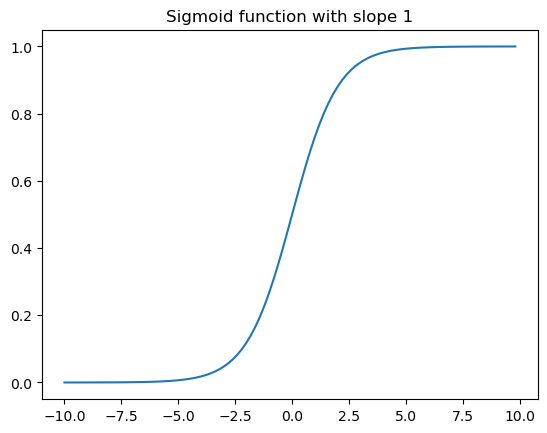

In [ ]:
x = np.arange(-10,10,0.2)
y = 1 / (1 + np.exp(-x))
plt.plot(x,y)
plt.title('Sigmoid function with slope 1')

Implement the methods of the following class `SigmNormalizer` that should implement sigmoid normalization. Its method `fit_transform(X)` transforms two-dimensional array `X` non-linearly using function $\sigma(x,\lambda)$.

In [ ]:
class SigmNormalizer(Normalizer):
    """A class for sigmoid normalization"""
    
    def __init__(self, lamda=1):
        """constructor for sigmoid normalizer"""
        self.lamda = lamda
            
    def fit_transform(self, X):
        """Fit SigmNormalizer to data X;
        the method returns transformed data.
        """  
        # your code goes here
        pass
                                
    def apply(self, X):
        """Apply normalization by the standard deviation to data X using parameters 
        of the transformation stored in the object.
        """
       # your code goes here
        pass
                        
    def inverse(self, X):
        """Apply the inverse transformation of normalization by the standard deviation to data X 
        using parameters of the transformation stored in the object.
        """
        # your code goes here
        pass

In [ ]:
X = np.array([[0.12, 2], [3, 5], [-123, 7]])
print(X)
sigmn = SigmNormalizer(lamda=2)
X_norm = sigmn.fit_transform(X)
print(X_norm)
assert(np.allclose(X_norm, np.array([[0.559713649, 0.982013790], [0.997527377, 0.999954602], [0, 0.999999168]])))
print(sigmn.inverse(X_norm))
assert(np.allclose(sigmn.inverse(X_norm), X))

[[ 1.20e-01  2.00e+00]
 [ 3.00e+00  5.00e+00]
 [-1.23e+02  7.00e+00]]
[[5.59713649e-001 9.82013790e-001]
 [9.97527377e-001 9.99954602e-001]
 [1.45732848e-107 9.99999168e-001]]
[[ 1.20e-01  2.00e+00]
 [ 3.00e+00  5.00e+00]
 [-1.23e+02  7.00e+00]]


In [ ]:
X = np.hstack((np.ones((3,1)), 3*np.ones((3,1)),np.arange(3).reshape((3,1))))
print(X)
sigmn = SigmNormalizer()
X_norm = sigmn.fit_transform(X)
print(X_norm)
assert(np.allclose(X_norm, np.array([[0.73105858, 0.95257413, 0.5],
                                     [0.73105858, 0.95257413, 0.73105858],
                                     [0.73105858, 0.95257413, 0.88079708]])))
print(sigmn.inverse(X_norm))
assert(np.allclose(sigmn.inverse(X_norm), X))

[[1. 3. 0.]
 [1. 3. 1.]
 [1. 3. 2.]]
[[0.73105858 0.95257413 0.5       ]
 [0.73105858 0.95257413 0.73105858]
 [0.73105858 0.95257413 0.88079708]]
[[ 1.  3. -0.]
 [ 1.  3.  1.]
 [ 1.  3.  2.]]


Are there functions implementing the above normalization method in `numpy` or `scikit-learn` libraries?

In [ ]:
import sklearn

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=19e2c2a7-f607-428f-bcc6-8ffd95c3074f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>